In [ ]:
!pip install librosa pydub praat-parselmouth
!pip install librosa matplotlib

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import parselmouth
from parselmouth.praat import call
from pydub import AudioSegment

In [ ]:
# 定义文件夹路径
folder_path = 'Pilot'
audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') or f.endswith('.mp3')]

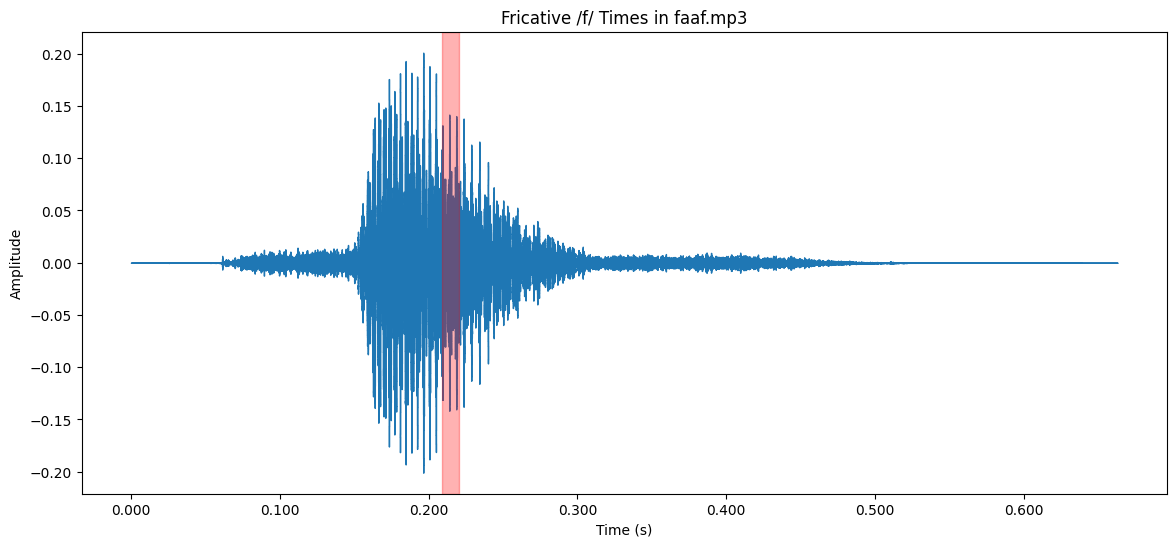

Fricative /f/ times in faaf.mp3: [(0.2089795918367347, 0.22058956916099773)]


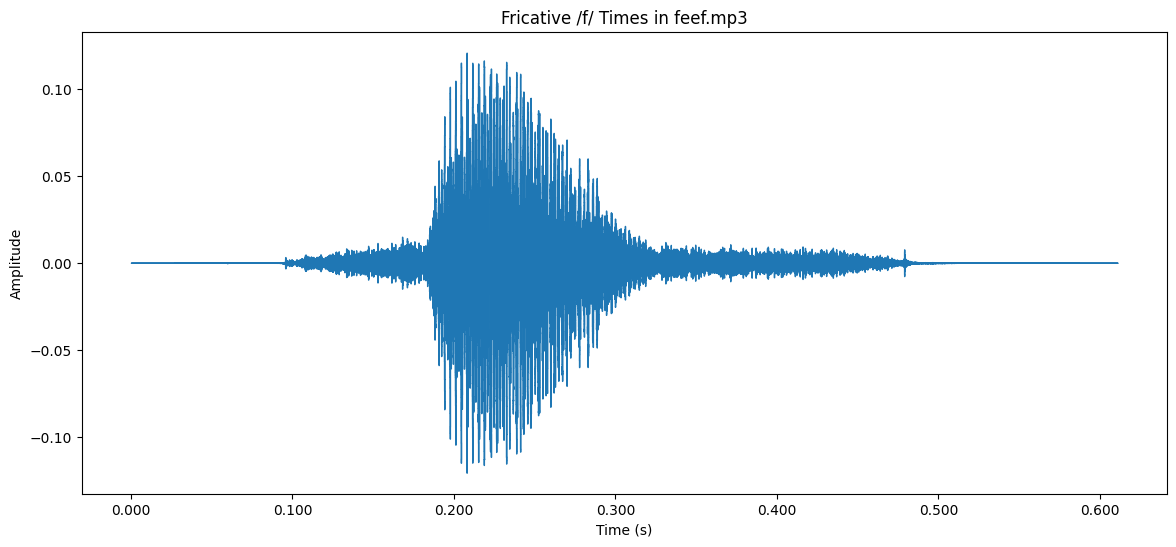

Fricative /f/ times in feef.mp3: []


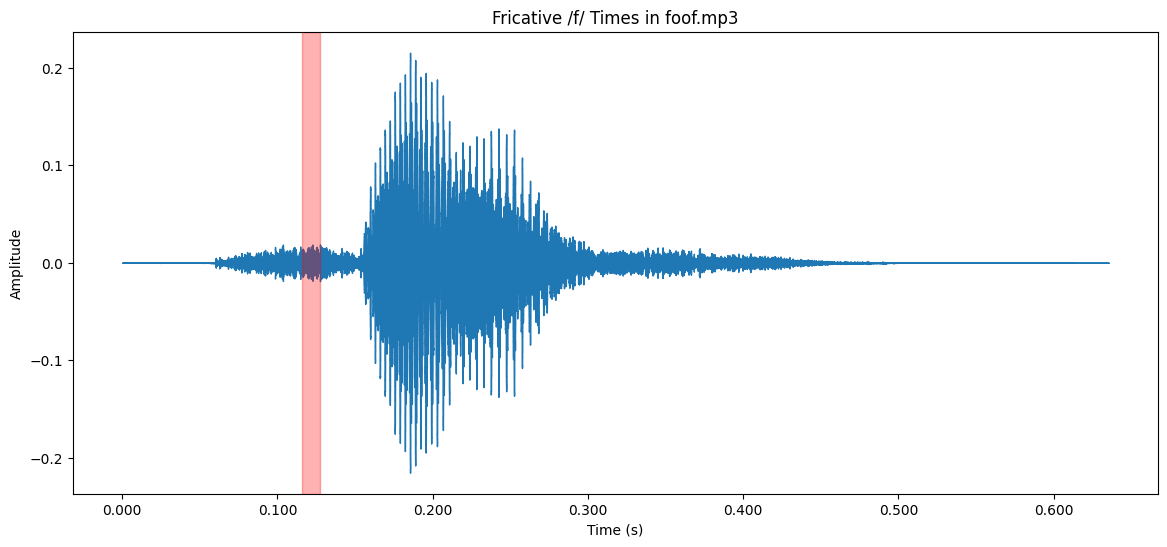

Fricative /f/ times in foof.mp3: [(0.11609977324263039, 0.12770975056689343)]


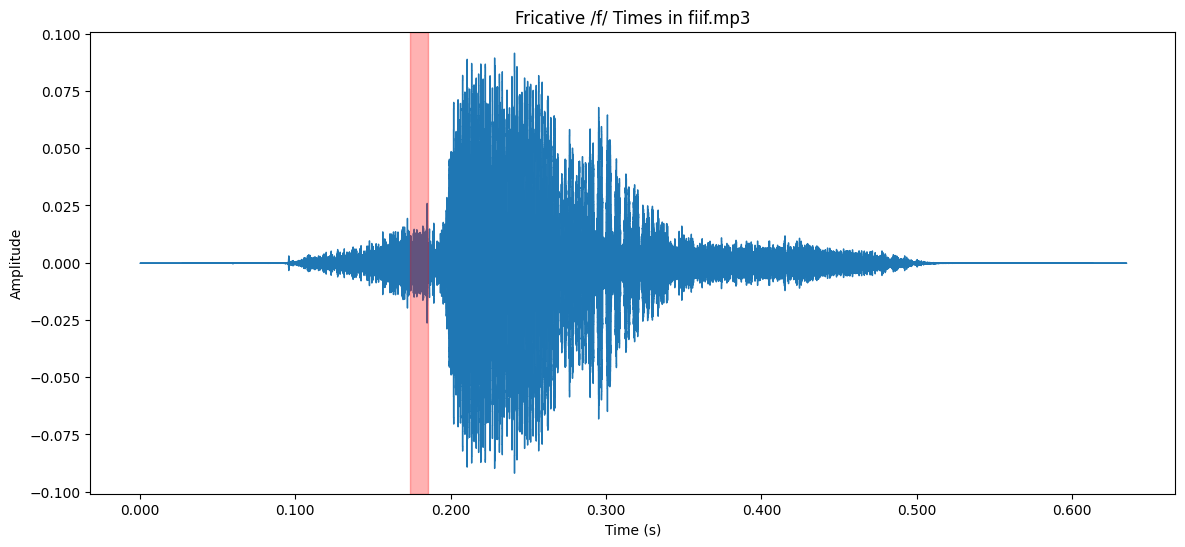

Fricative /f/ times in fiif.mp3: [(0.17414965986394557, 0.18575963718820862)]


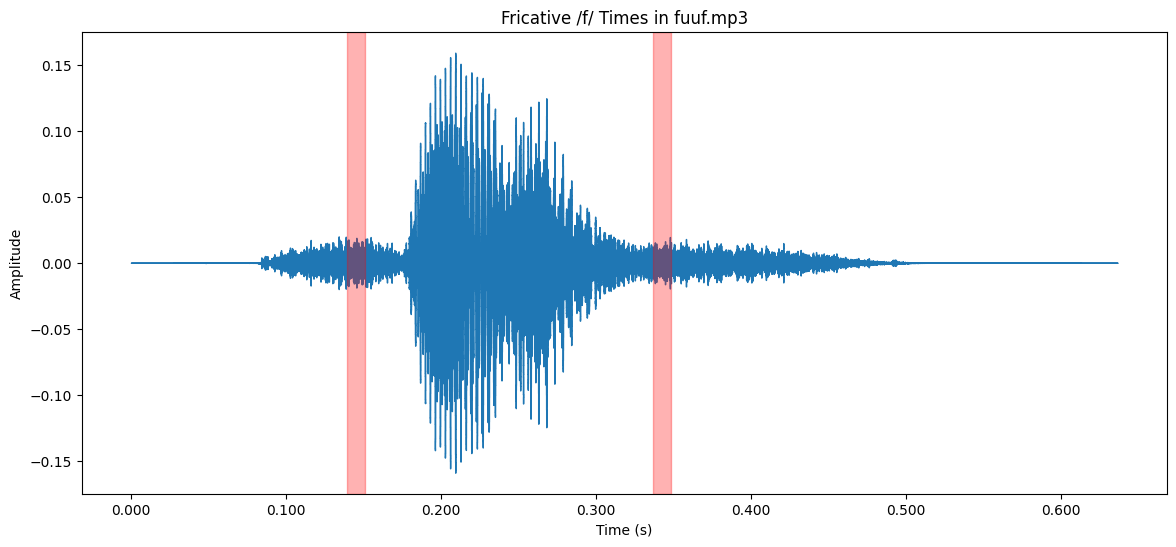

Fricative /f/ times in fuuf.mp3: [(0.13931972789115646, 0.1509297052154195), (0.33668934240362813, 0.34829931972789113)]
所有文件处理完成。


In [ ]:
# 摩擦音/f/的特性主要是高频成分
fricative_frequency_range = (4000, 8000)  # 定义摩擦音的频率范围

def find_fricative_times(y, sr, filename):
    # 计算短时傅里叶变换（STFT）
    D = np.abs(librosa.stft(y))
    freqs = librosa.fft_frequencies(sr=sr)
    times = librosa.frames_to_time(np.arange(D.shape[1]), sr=sr)

    # 计算高频能量的和
    high_freq_energy = np.sum(D[(freqs >= fricative_frequency_range[0]) & (freqs <= fricative_frequency_range[1])], axis=0)

    # 找到高频能量超过阈值的时间段
    threshold = np.mean(high_freq_energy) + 2 * np.std(high_freq_energy)
    fricative_times = []
    is_fricative = False
    start_time = 0
    for i, energy in enumerate(high_freq_energy):
        if energy > threshold:
            if not is_fricative:
                start_time = times[i]
                is_fricative = True
        else:
            if is_fricative:
                end_time = times[i]
                fricative_times.append((start_time, end_time))
                is_fricative = False

    # 绘制音频波形图和摩擦音时间段
    plt.figure(figsize=(14, 6))
    librosa.display.waveshow(y, sr=sr)
    for (start, end) in fricative_times:
        plt.axvspan(start, end, color='r', alpha=0.3)
    plt.title(f'Fricative /f/ Times in {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # 输出摩擦音时间段
    print(f"Fricative /f/ times in {filename}: {fricative_times}")

# 遍历所有音频文件并分析摩擦音/f/时间段
for filename in audio_files:
    file_path = os.path.join(folder_path, filename)
    y, sr = librosa.load(file_path, sr=None)
    find_fricative_times(y, sr, filename)

print("所有文件处理完成。")
